## **Housing Price Prediction Assignment using Advanced Regression**

### **Problem Statement - Part I**
### Assignment Part-I
* A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


* The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

* The company wants to know the following things about the prospective properties:

  * Which variables are significant in predicting the price of a house, and
  * How well those variables describe the price of a house.


* Also, determine the optimal value of lambda for ridge and lasso regression.



**Business Goal**

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Table of Contents**

1. Read the CSV and Understand the Data
2. Data Exploration by 
    * Univariate Analysis
    * Bivariate Analysis
3. Feature Engineering Process
4. Data Preprocessing
    * Missing Value/Data Treatment
    * Dummy Variable Creation/Imputing
    * Outlier Treatment
5. Model Building, Tuning & Evaluation
    * Split the Data into Dependent and Independent variables
    * Train - Test Spliting
    * Scaling Numerical Columns
    * Model 1: Ridge Regression Method
    * Model 2: Lasso Regression Method

6. Comparing the two models - Ridge and Lasso
7. Inferences for '**Housing Price Prediction**'
8. Answering the subjective questions

In [1]:
#Load Libraries

## Import requisite libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 1. Read the CSV and Understand the Data

In [4]:
## Load the csv file
df = pd.read_csv('train.csv')

## View the first five rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
## Check the dimensions
print("Number of Rows = ", df.shape[0])
print("Number of Columns = ", df.shape[1])

Number of Rows =  1460
Number of Columns =  81


**The following categorical columns have NA, which might be erroneously considered as missing value by pandas:-**

* Alley : NA = No alley access
* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : NA = No Basement
* FireplaceQu : NA = No Fireplace
* GarageType, GarageFinish, GarageQual, GarageCond : NA = No Garage
* PoolQC : NA = No Pool
* Fence : NA = No Fence
* MiscFeature : NA = None

So, we will have to replace these values by '***None***' before finding missing values.

For this we will read the csv file again and set the parameter '***keep_default_na***' to ***False***

In [6]:
## Preventing 'NA' to be read as 'NaN' by pandas
df = pd.read_csv('train.csv', keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [7]:
## Replacing all 'NA' for all above mentioned columns by value 'None'
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [8]:
## Check the info/details of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

**Going through the data types of all columns and comparing them with the data description of each columns, we determine that the types of following columns needs to be changed:**

* Columns - ***MSSubClass***, ***OverallQual***, ***OverallCond*** need to be converted to **object** type
* Columns - ***LotFrontage*** and ***MasVnrArea*** needs to be converted to **numeric** type.

In [9]:
## Convert 3 columns to 'object' type
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [10]:
## Convert 2 columns to 'numeric' type
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [11]:
## Verify that the data types of 5 columns have changed
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [12]:
## Statistical description of the numerical columns
df.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Check for the skewed distribution**

The mean of few variables like 2ndFlrSF are very different from their median values, so they have skewed distributions.

In [13]:
## Check for missing values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

There are only 2 columns containing missing values : 

***LotFrontage*** and ***MasVnrArea***, and we will perform missing value treatment.

## **2. Data Exploration**

### **Univariate Analysis**

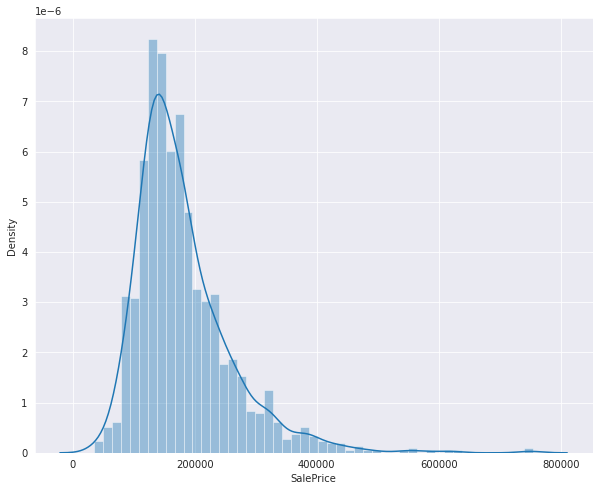

In [14]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

**The target variable is right-skewed**

In [15]:
## Check the skewness of target variable
df['SalePrice'].skew()

1.8828757597682129

**The skewness is greater than 1, so the target variable is highly skewed.**

In [16]:
## Check the kurtosis of target variable
df['SalePrice'].kurt()

6.536281860064529

**The kurtosis is greater than 1, so the distribution of target variable is highly peaked.**

**So, we will log transform our target variable** 

In [17]:
## Log transform the target variable
df['SalePrice'] = np.log(df['SalePrice'])

In [18]:
## Check the skewness of target variable again
df['SalePrice'].skew()

0.12133506220520406

In [19]:
## Check the kurtosis of target variable again
df['SalePrice'].kurt()

0.8095319958036296

**Both skewness and kurtosis are less than 1.**

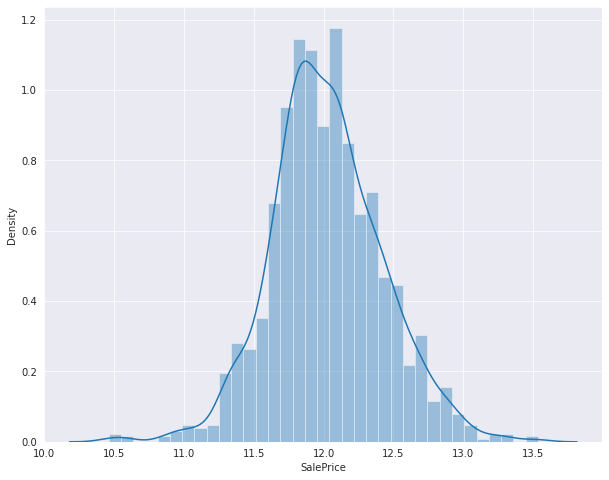

In [20]:
## Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

**So, our target variable has normal distribution now.**

In [21]:
## Divide the dataframe df into numerical and categorical columns for EDA

## Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429216


In [22]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,None,None,None,WD,Normal


### **EDA on Numerical Columns**

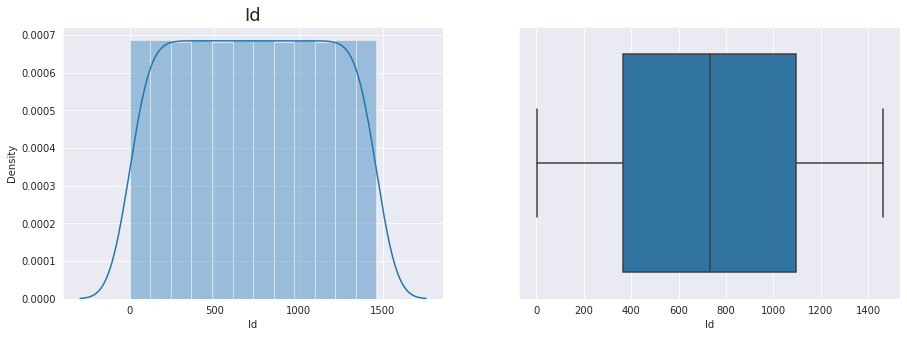

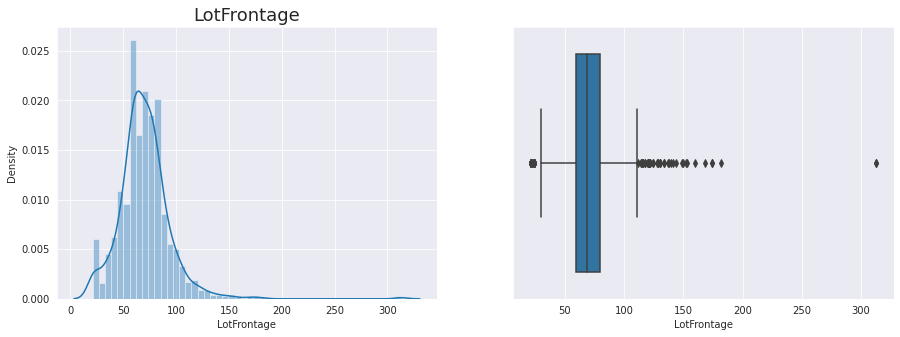

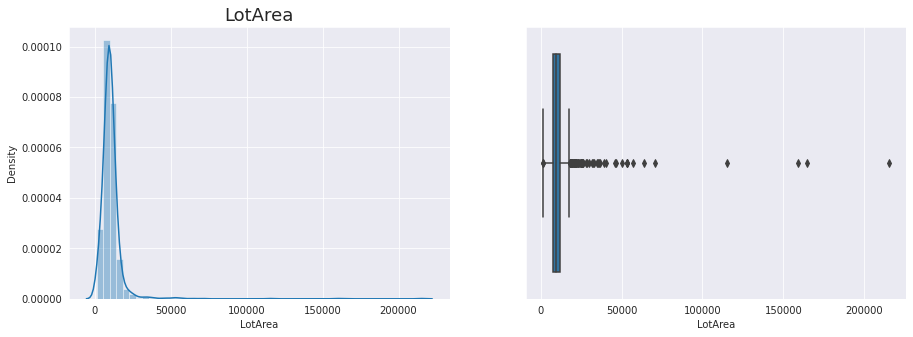

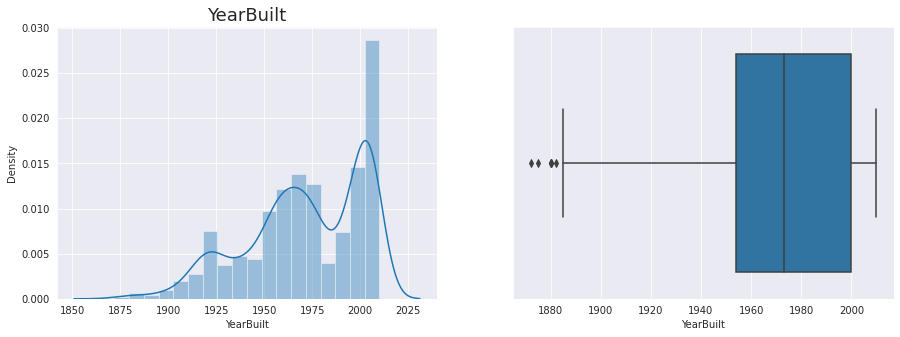

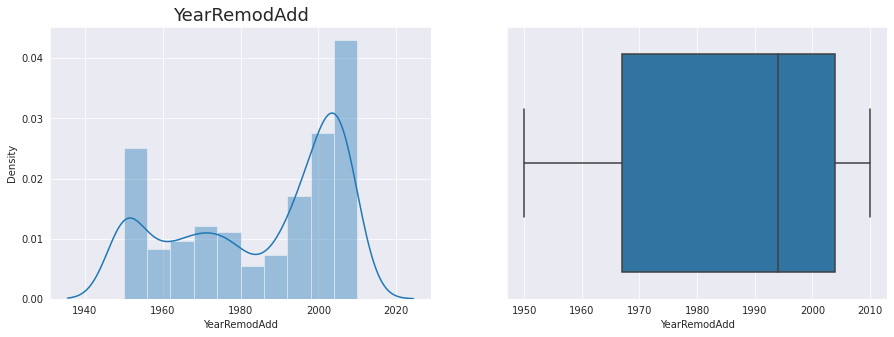

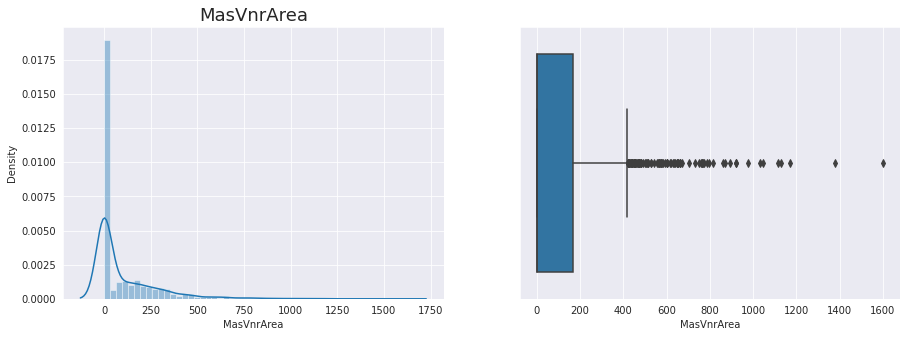

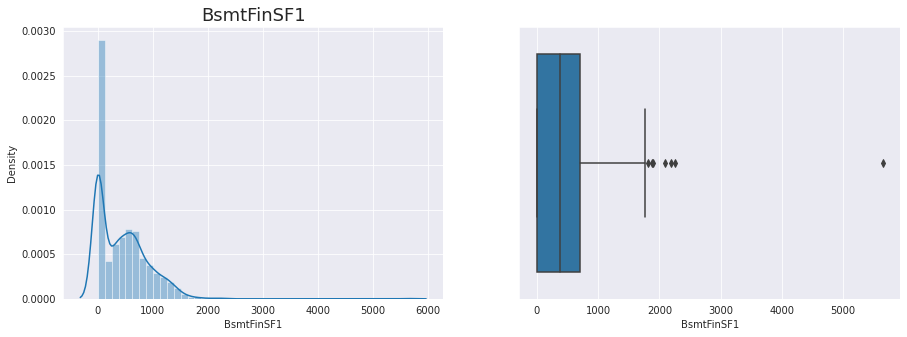

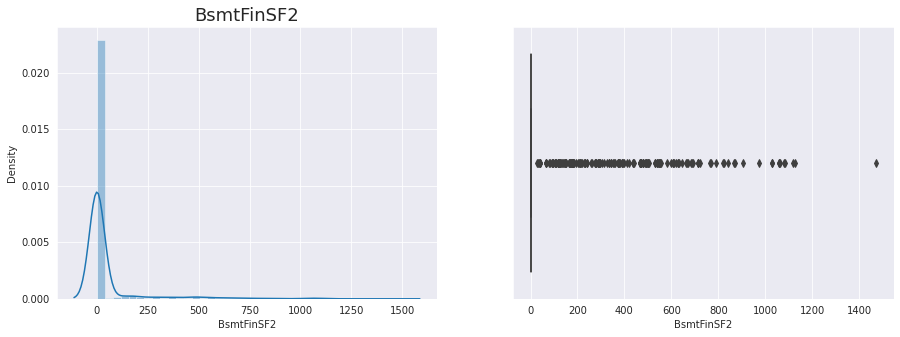

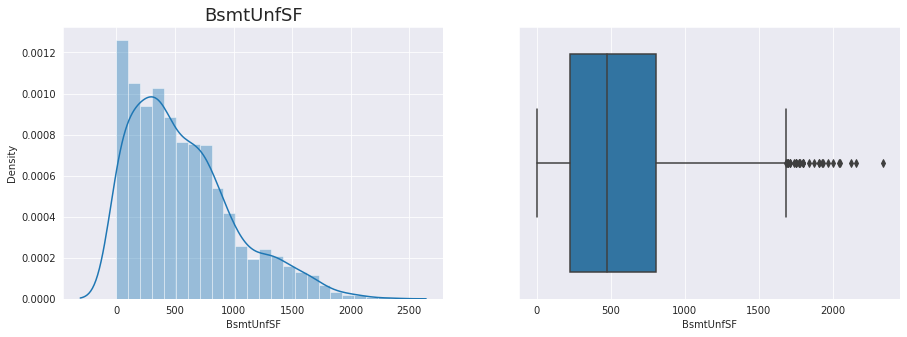

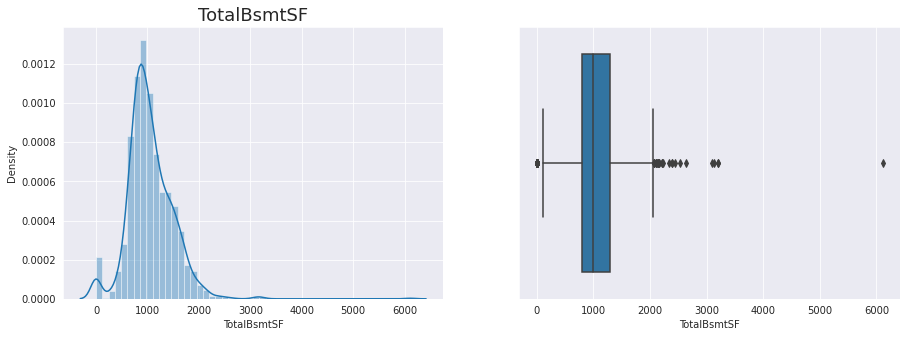

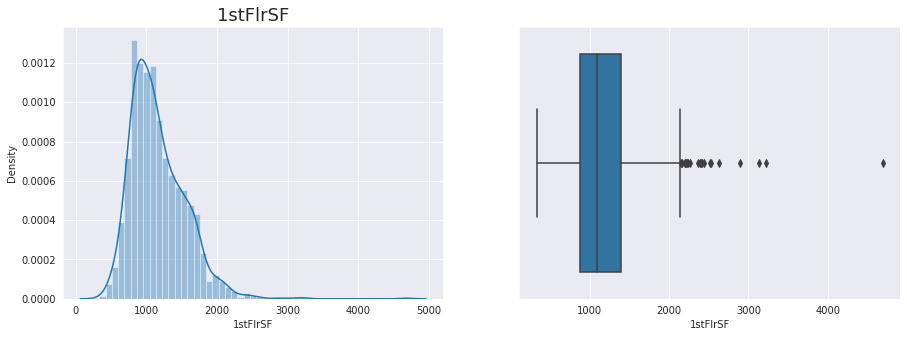

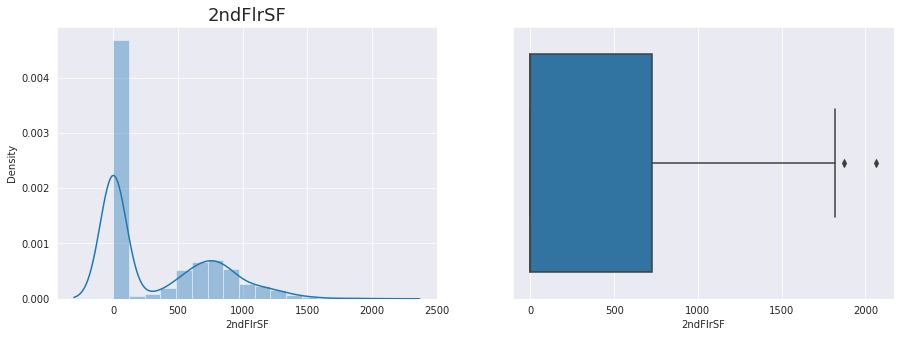

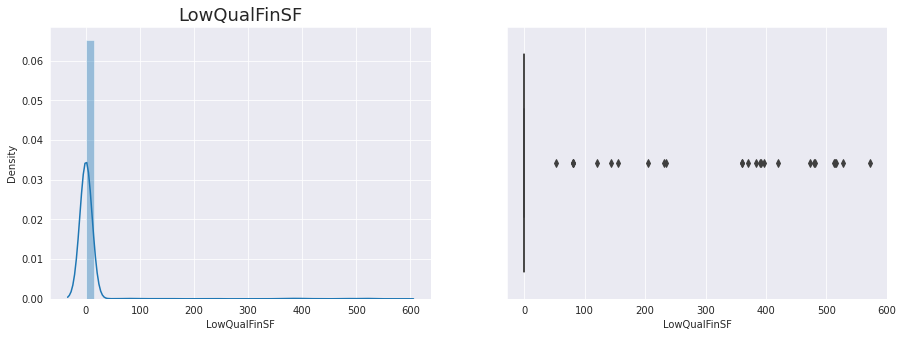

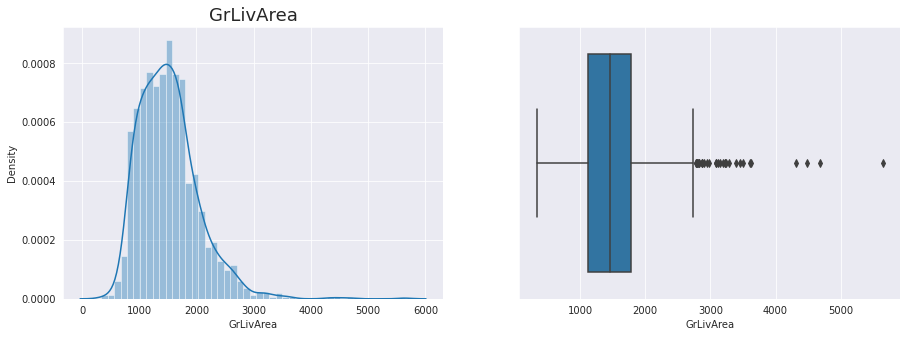

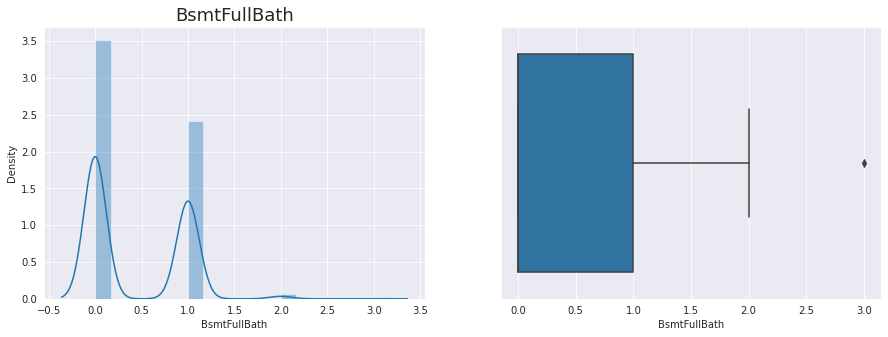

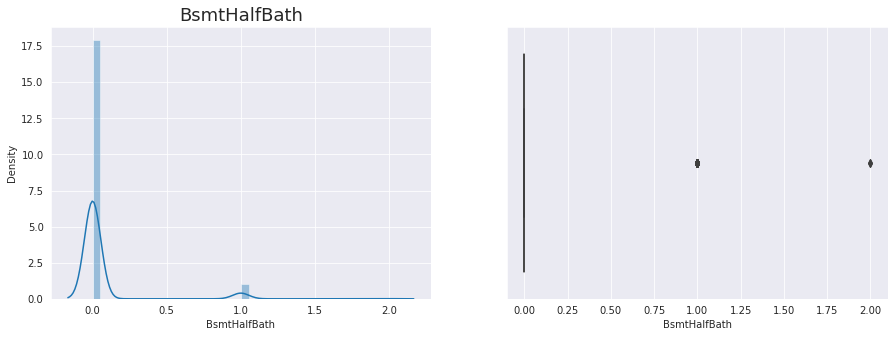

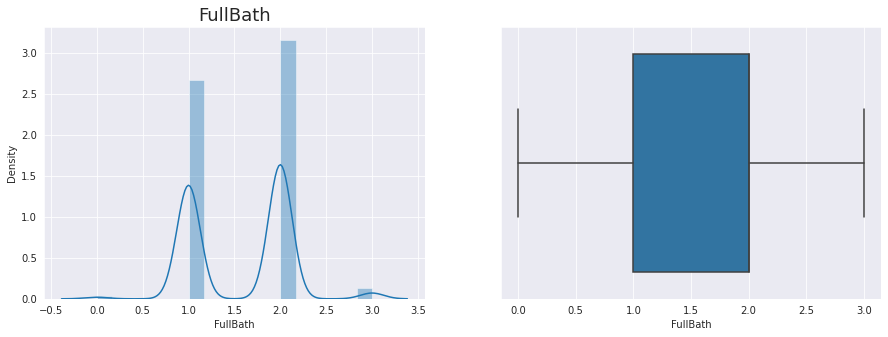

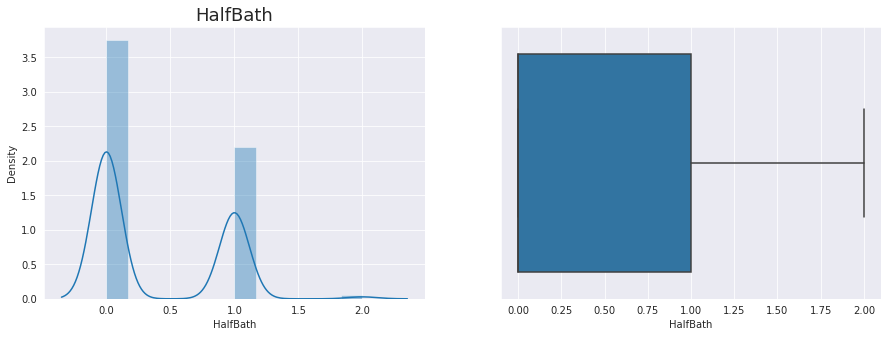

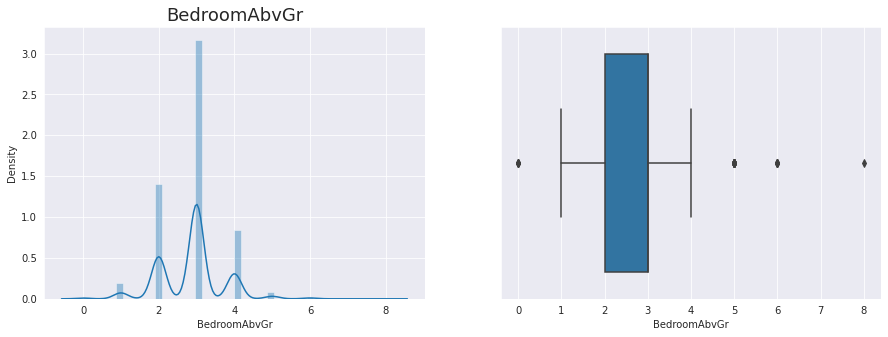

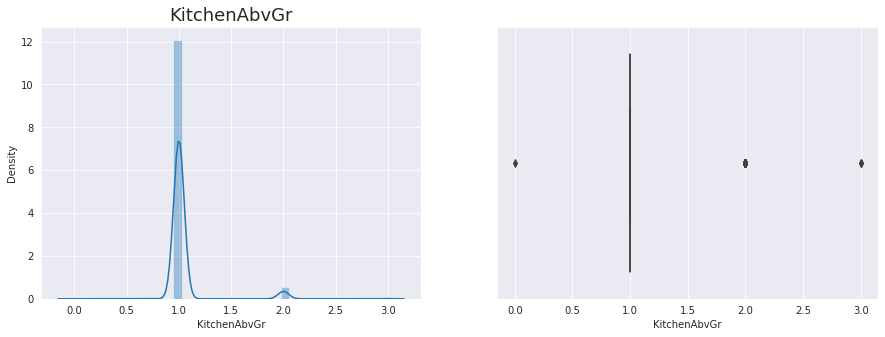

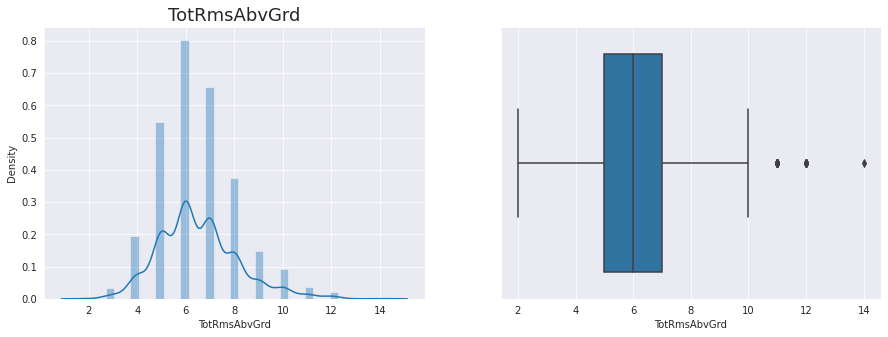

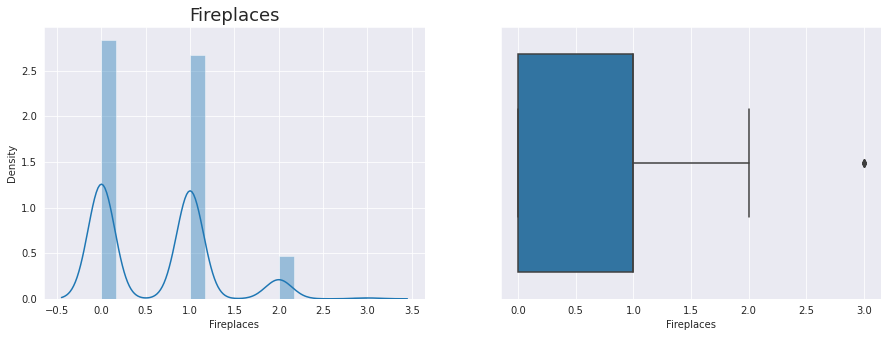

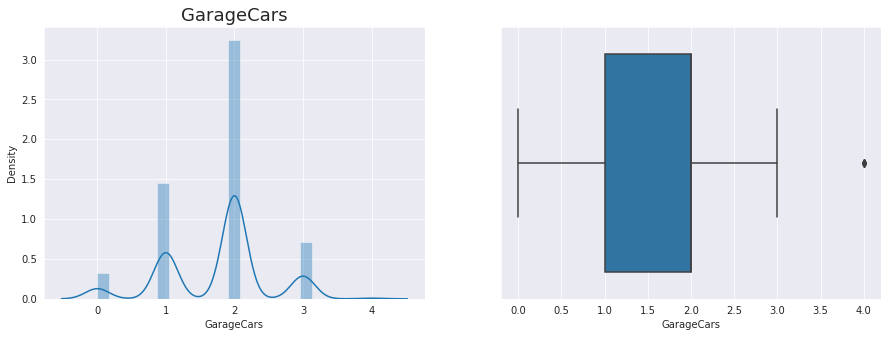

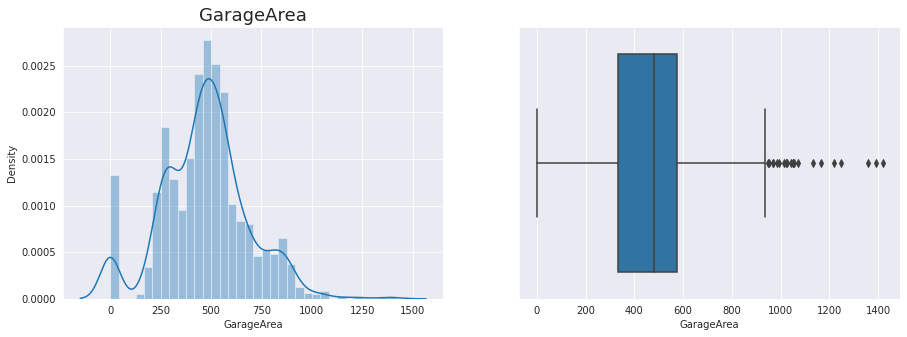

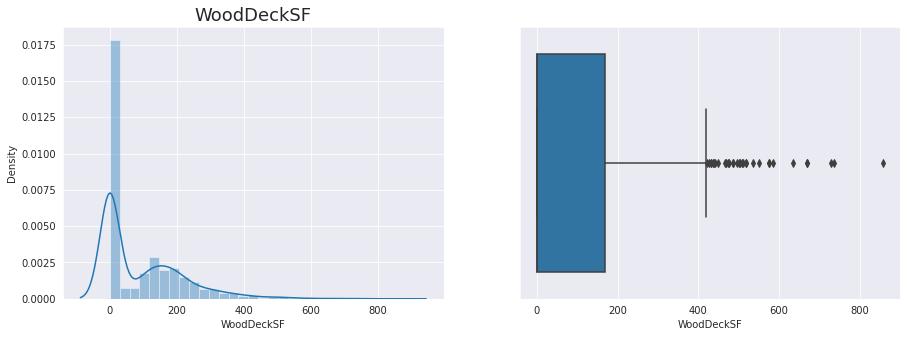

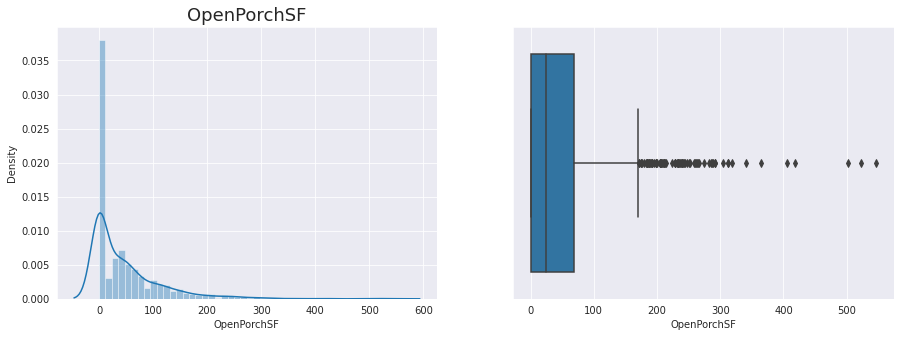

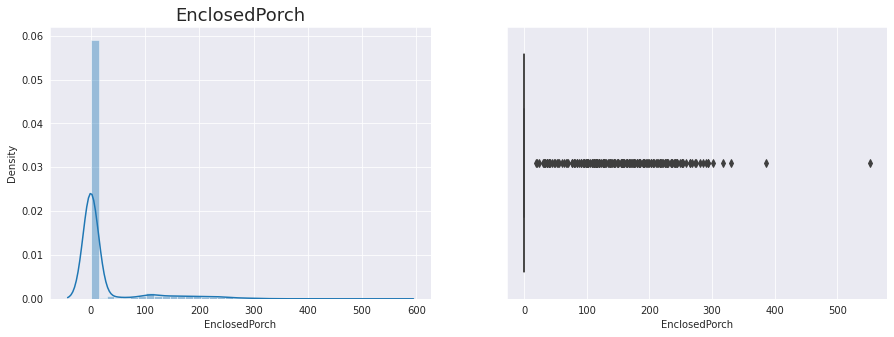

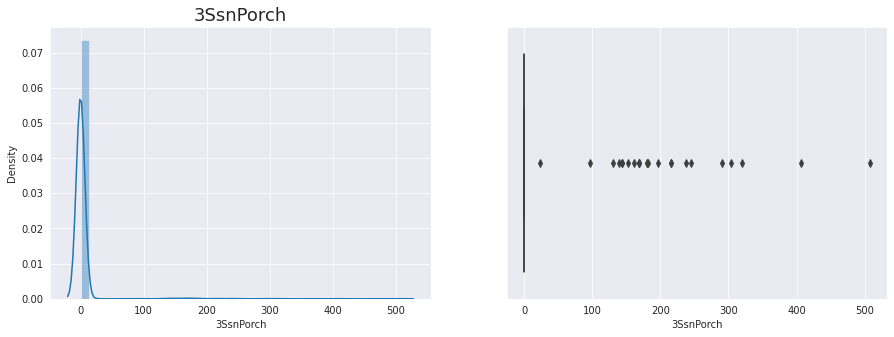

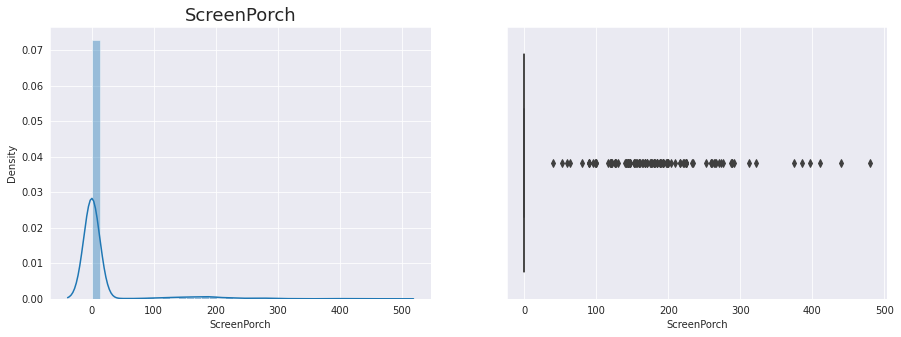

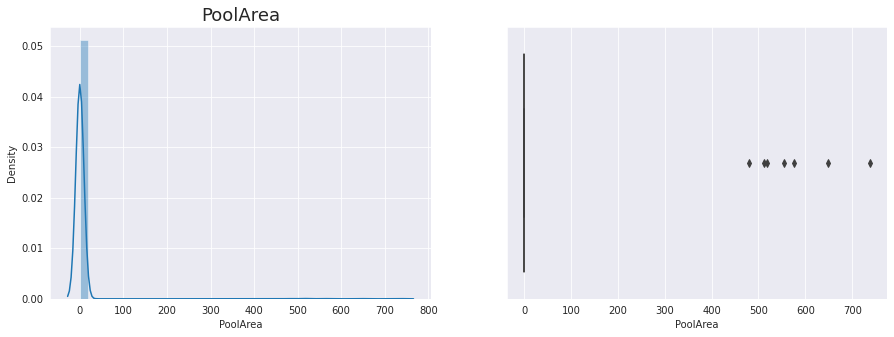

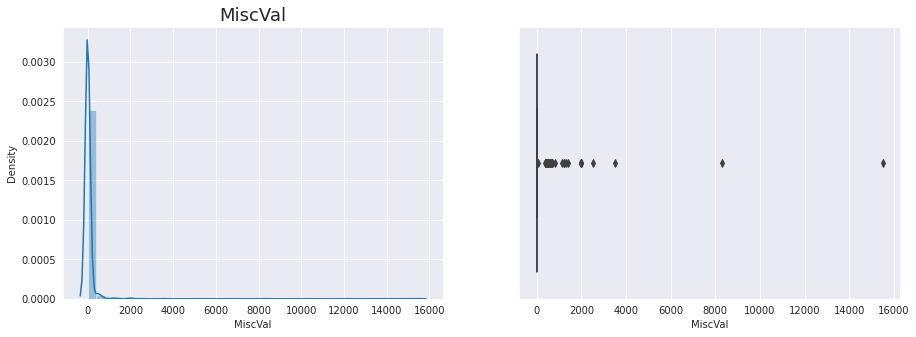

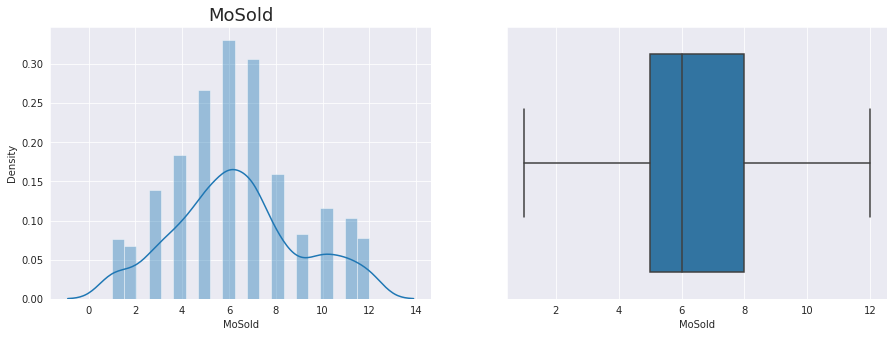

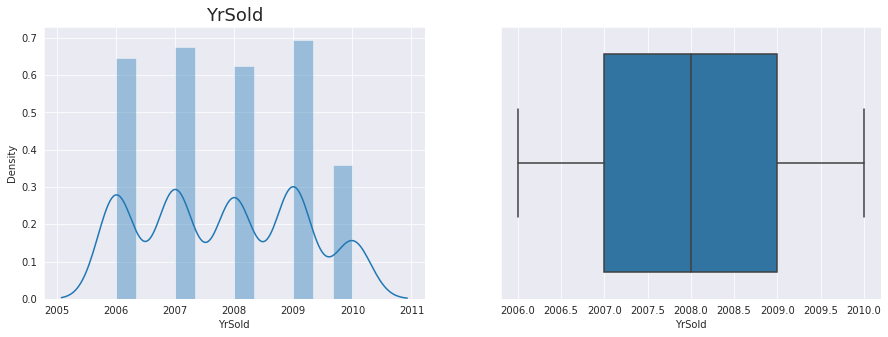

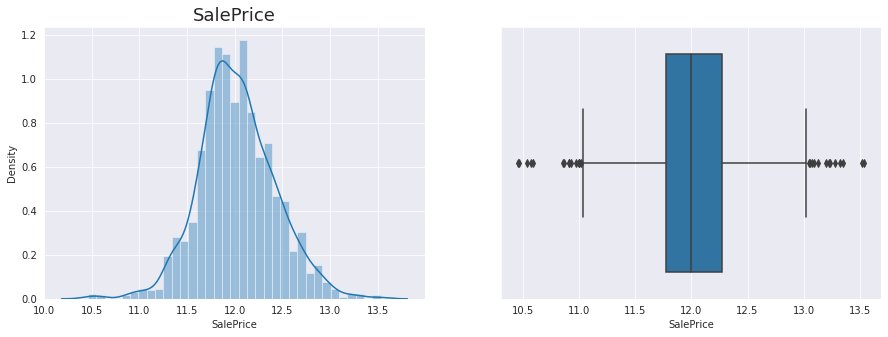

In [23]:
## View the distribution of all numeric variables using histograms and boxplots

for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()  

**Many of the numerical columns are having non-normal distribution.**

**Most of the columns have outliers. So, we will require to do Outlier treatment.**

### **EDA on Categorical Columns**

In [24]:
## View the unique values of all Categorical columns
for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gab

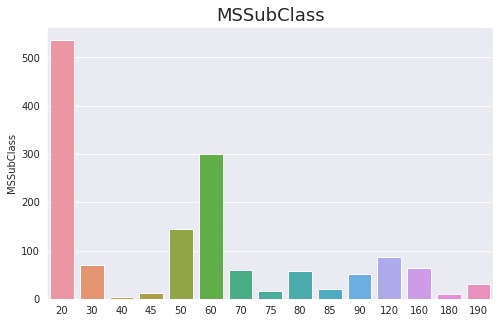

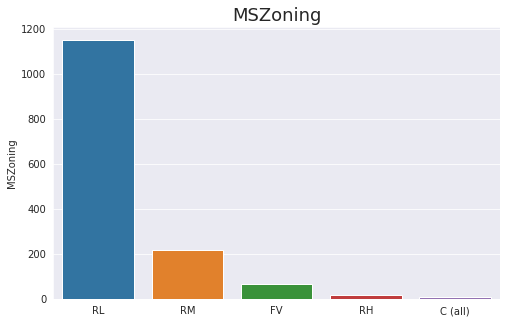

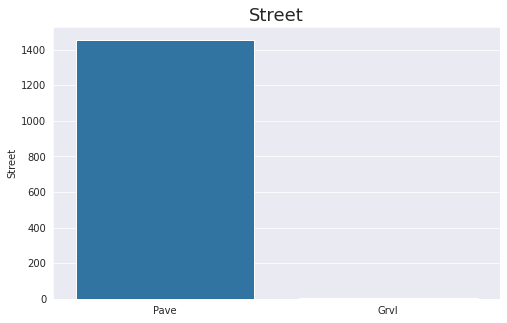

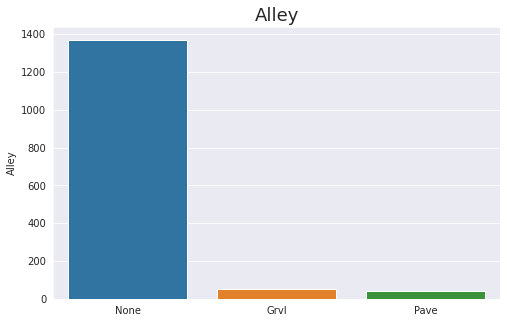

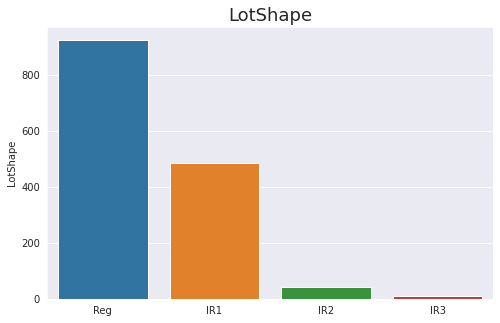

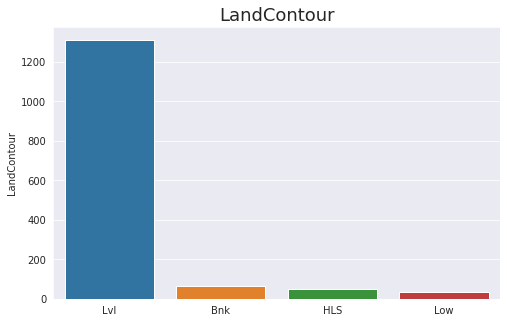

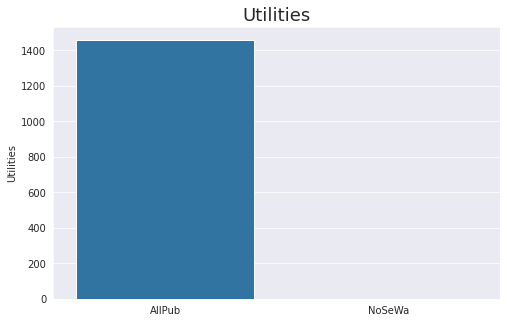

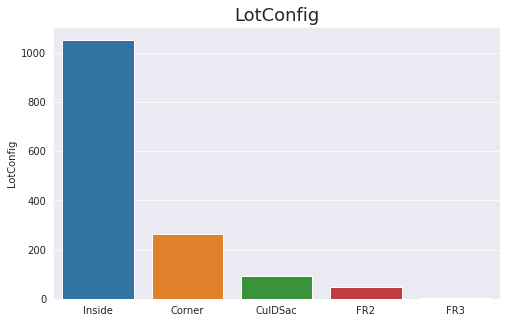

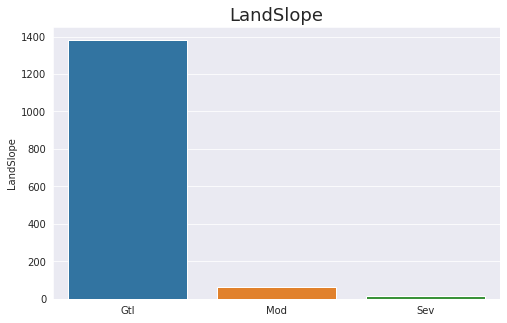

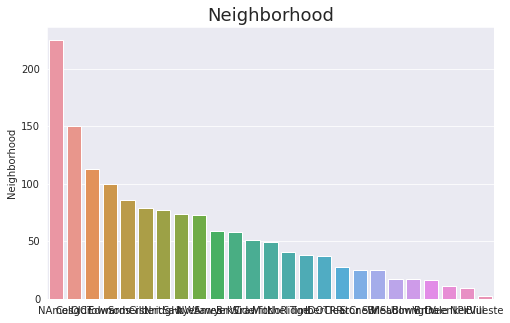

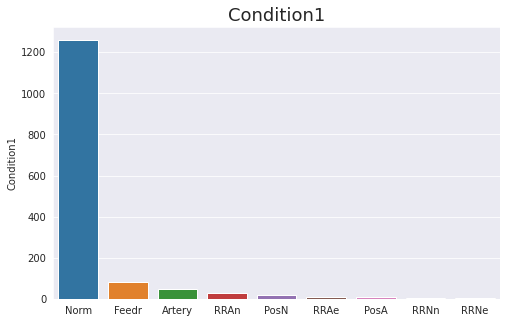

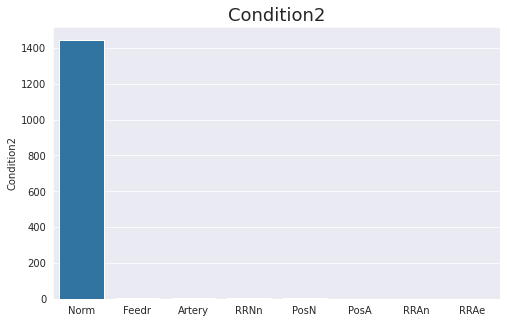

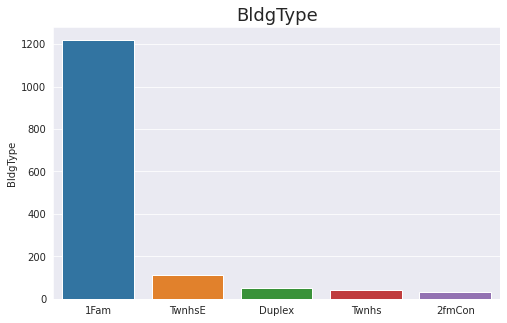

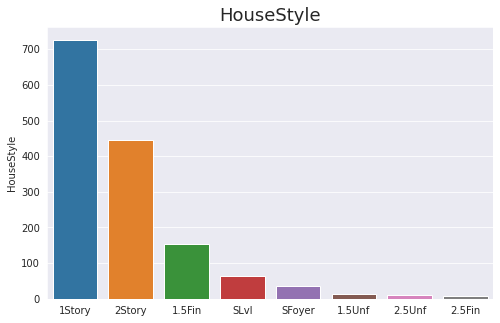

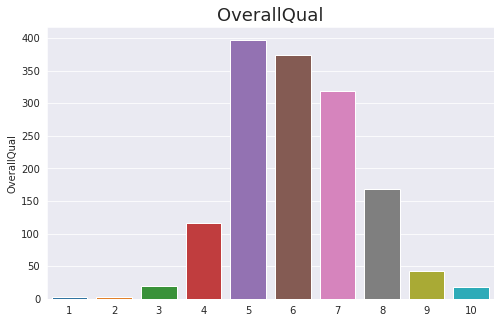

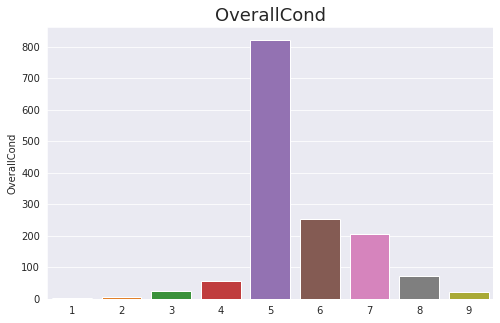

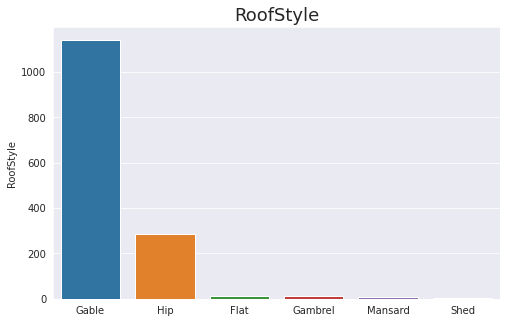

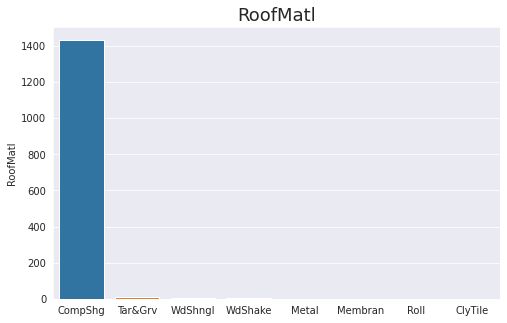

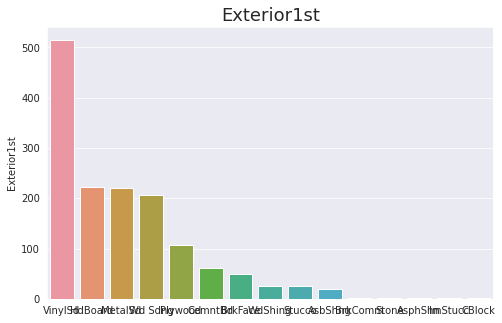

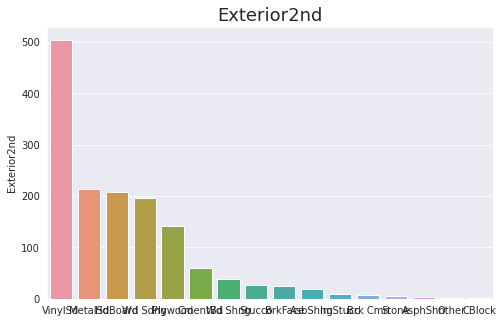

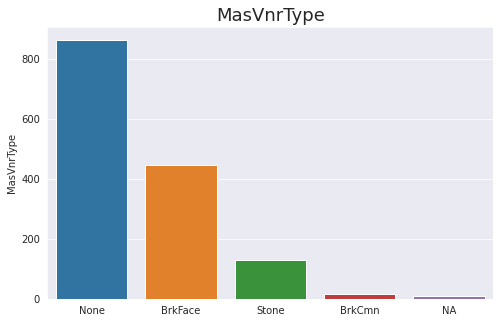

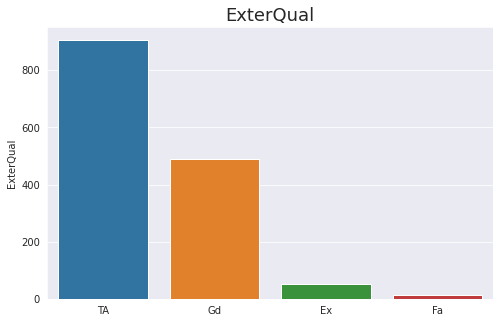

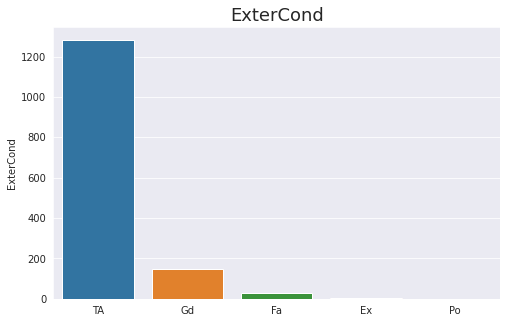

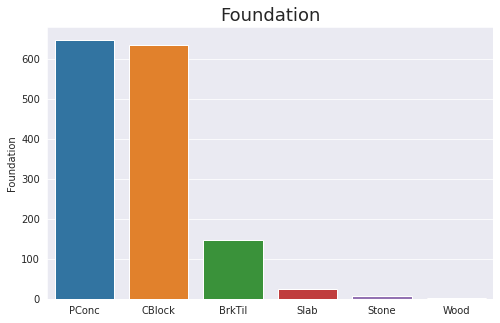

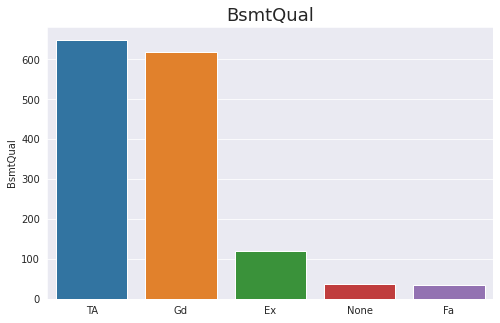

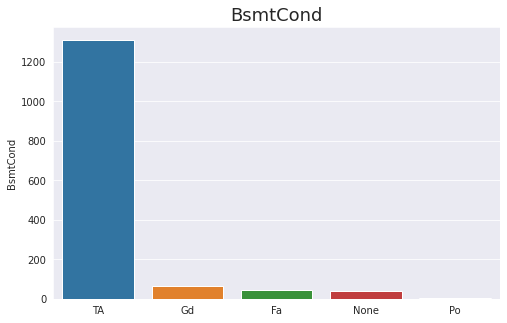

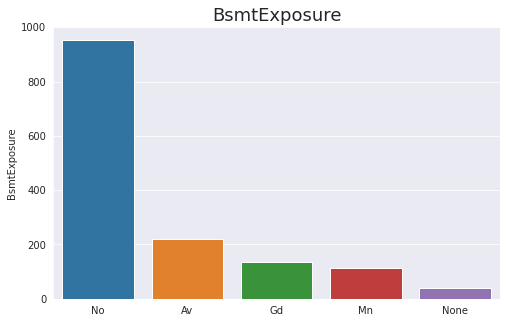

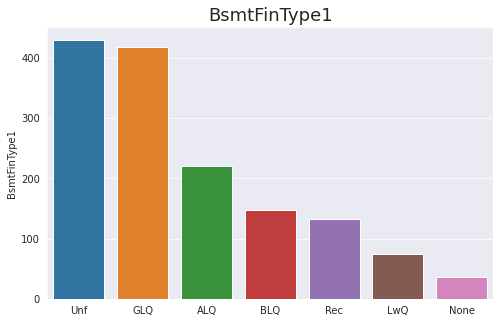

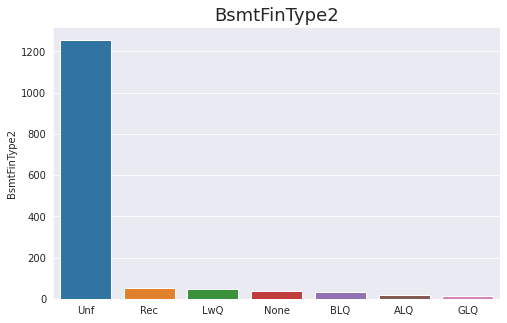

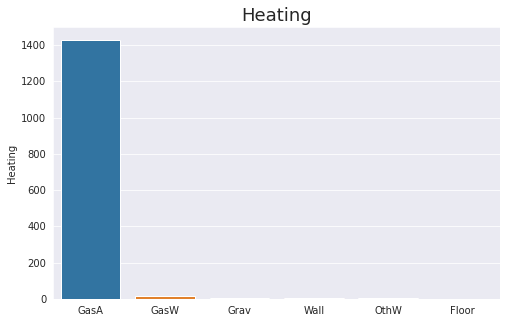

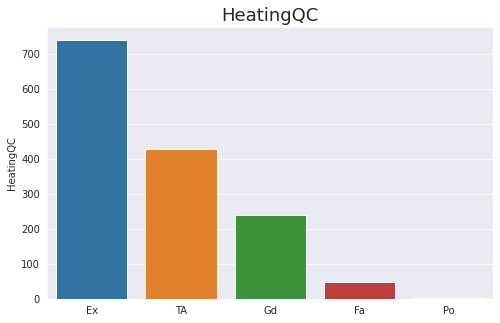

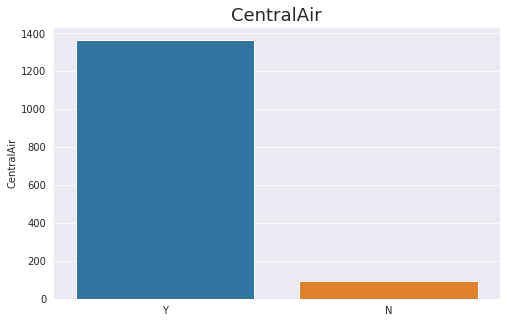

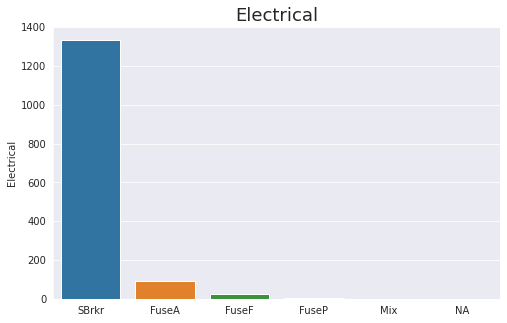

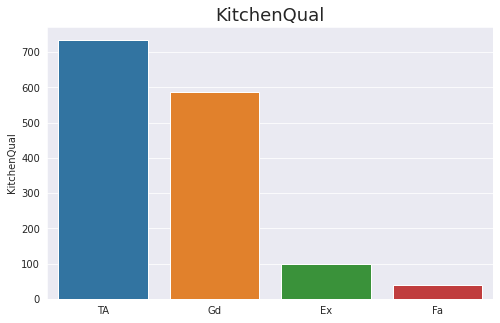

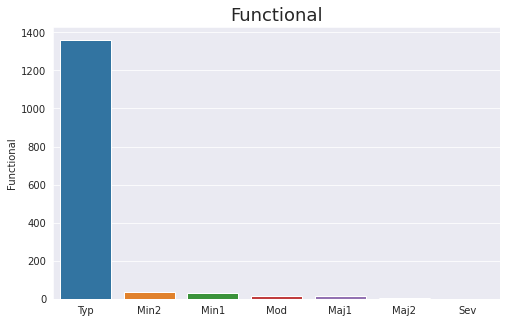

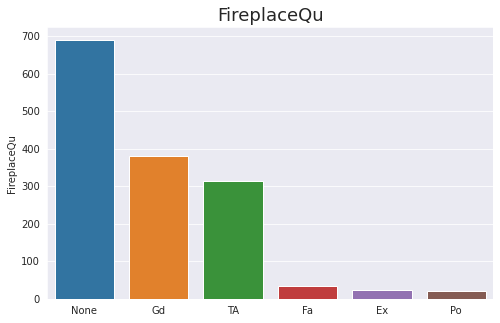

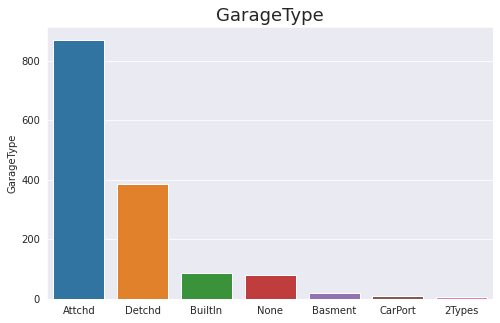

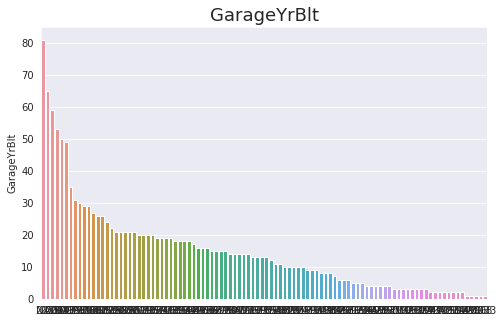

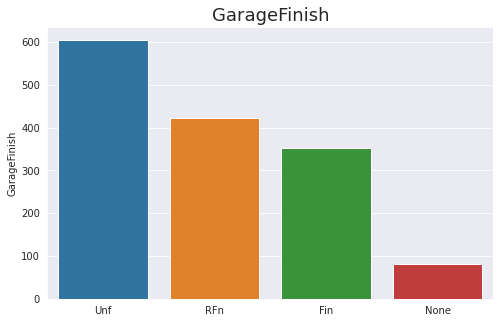

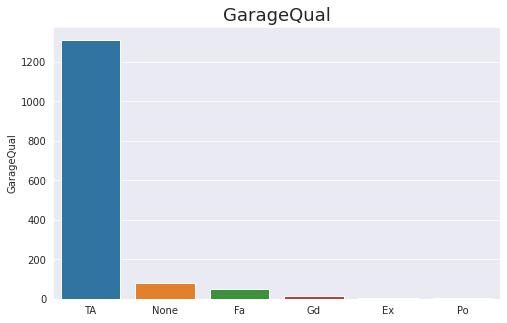

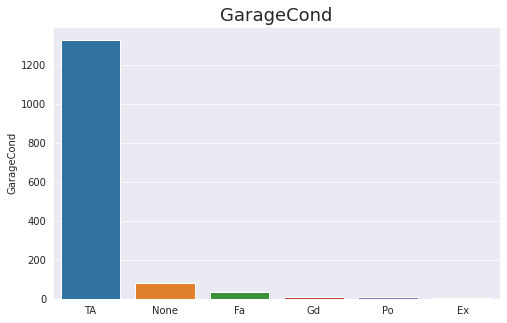

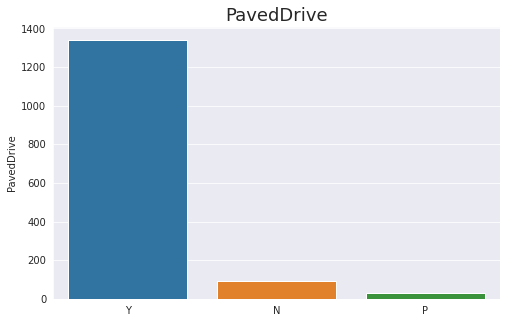

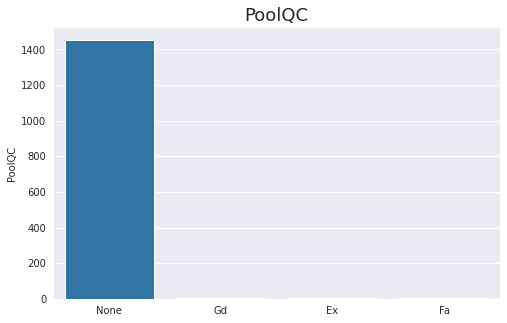

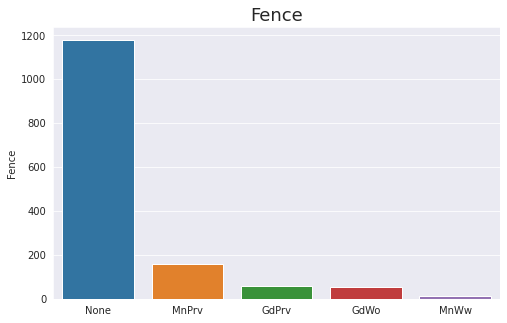

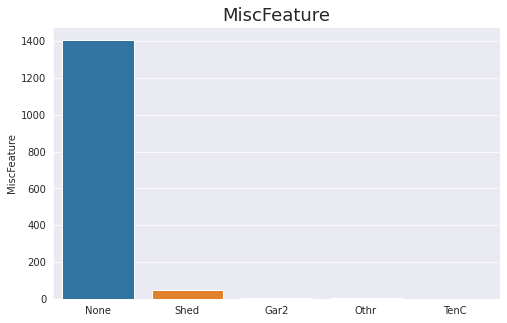

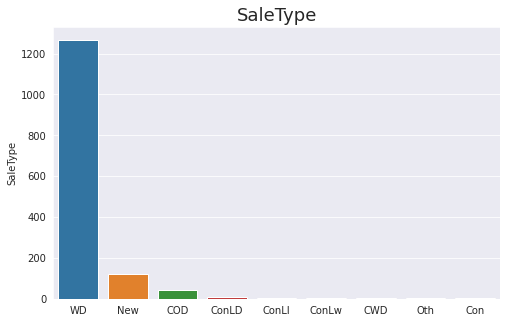

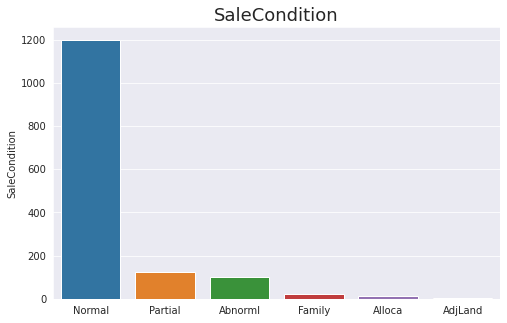

In [25]:
## Visualizing the levels of categorical columns using bar plots
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts())
    plt.show()

**So we observe from above value counts and bar plots that there is no column with single unique value that we could remove.**

### **Bivariate Analysis**

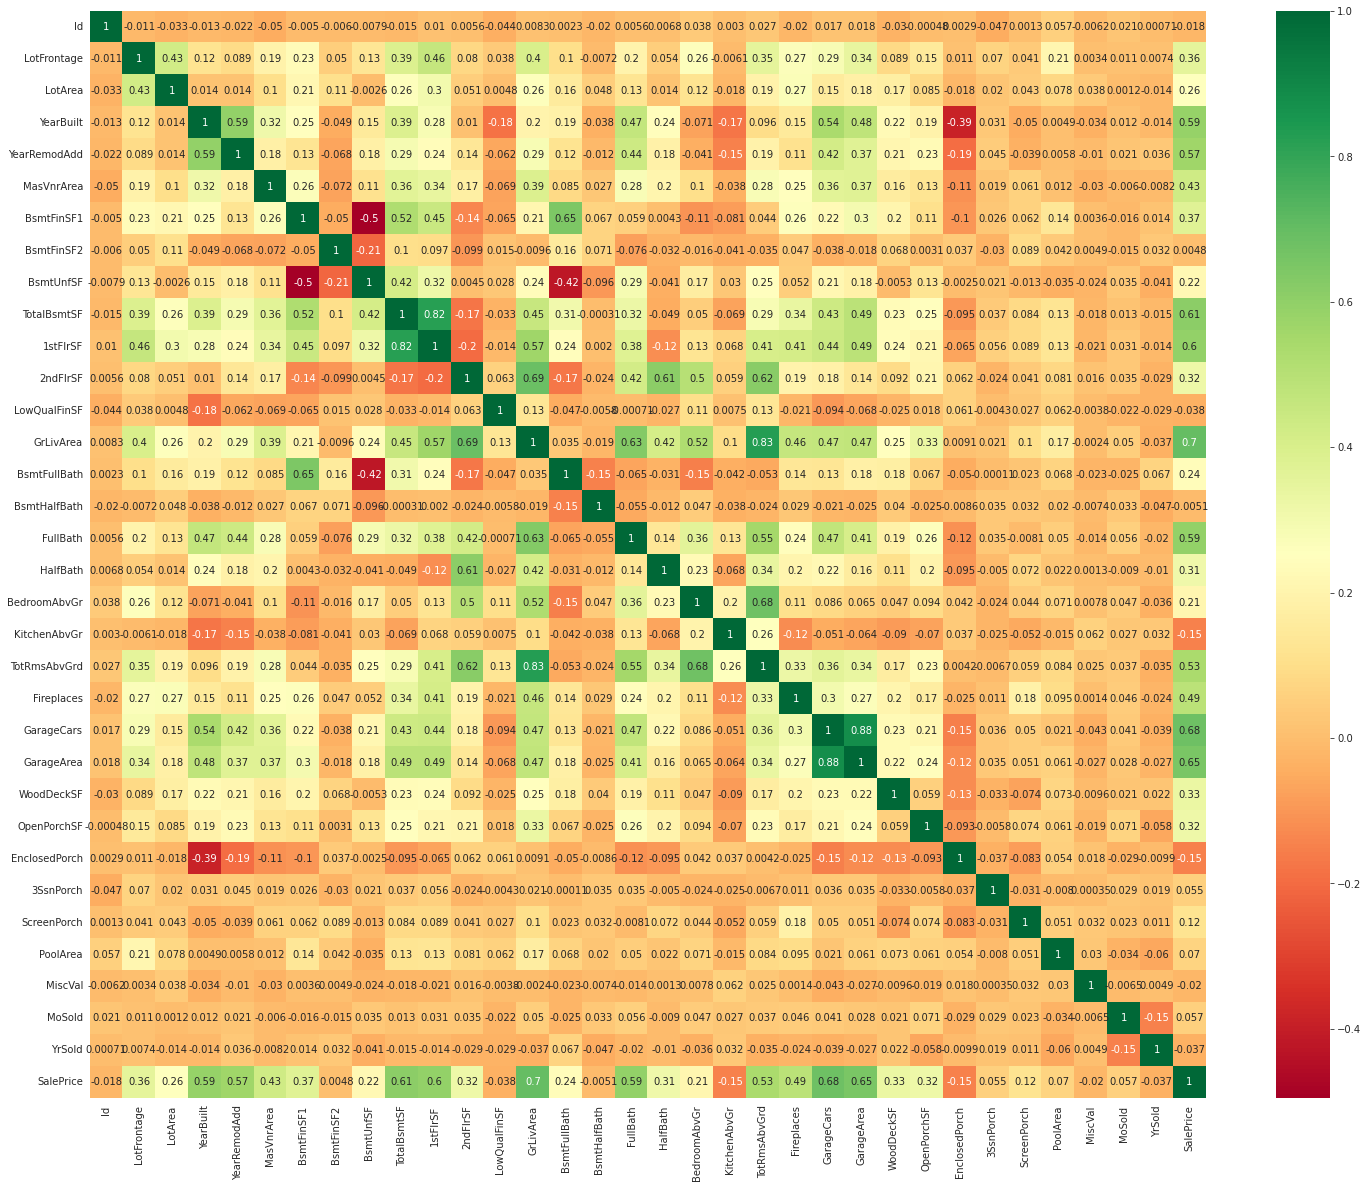

In [26]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

* **Many columns are highly correlated with each other.**

* **Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.**

* **As there is multicollinearity among predictors in our data, it would be good to use Ridge Regression.**

# **3. Feature Engineering**

In [27]:
## Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']

In [28]:
## Drop the two columns from which we created new one
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [29]:
## View the dataframe again
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,12.429216,8


# **4. Data Preprocessing**

## **Missing Value Treatment**

In [30]:
## View the missing values in all features
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

* **There are missing values only in two columns LotFrontage and MasVnrArea**

* **As they are numerical columns, we will replace the missing values by mean value of the respective columns**

In [31]:
## Replacing missing values in the above meniioned two columns by their means
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [32]:
## Check for missing values again 
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### **Our data is clean now..**

## **Dummy Variable Creation**

In [33]:
## Separate the categorical and numerical features again from original dataframe
## (as we have added one feature and removed two from original data)
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [34]:
## One hot encoding the categorical columns
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYrBlt_1921,GarageYrBlt_1922,GarageYrBlt_1923,GarageYrBlt_1924,GarageYrBlt_1925,GarageYrBlt_1926,GarageYrBlt_1927,GarageYrBlt_1928,GarageYrBlt_1929,GarageYrBlt_1930,GarageYrBlt_1931,GarageYrBlt_1932,GarageYrBlt_1933,GarageYrBlt_1934,GarageYrBlt_1935,GarageYrBlt_1936,GarageYrBlt_1937,GarageYrBlt_1938,Garag

In [35]:
## Check the dimensions
df_cat_encoded.shape

(1460, 353)

## **Outlier treatment**

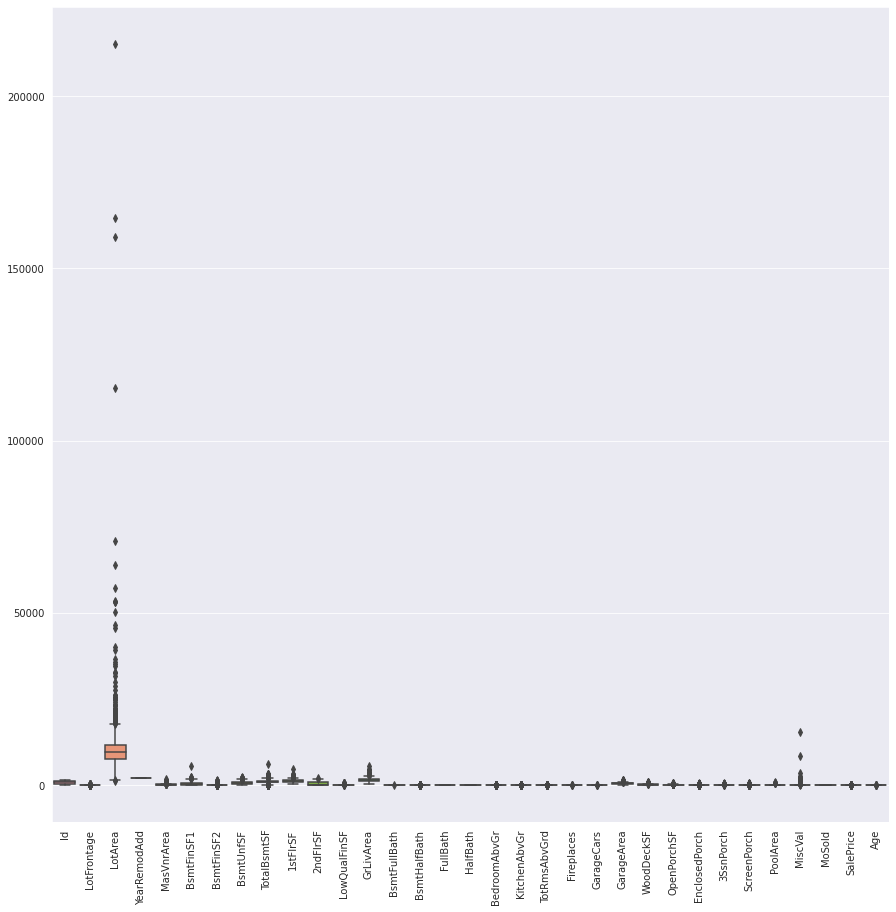

In [36]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [37]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

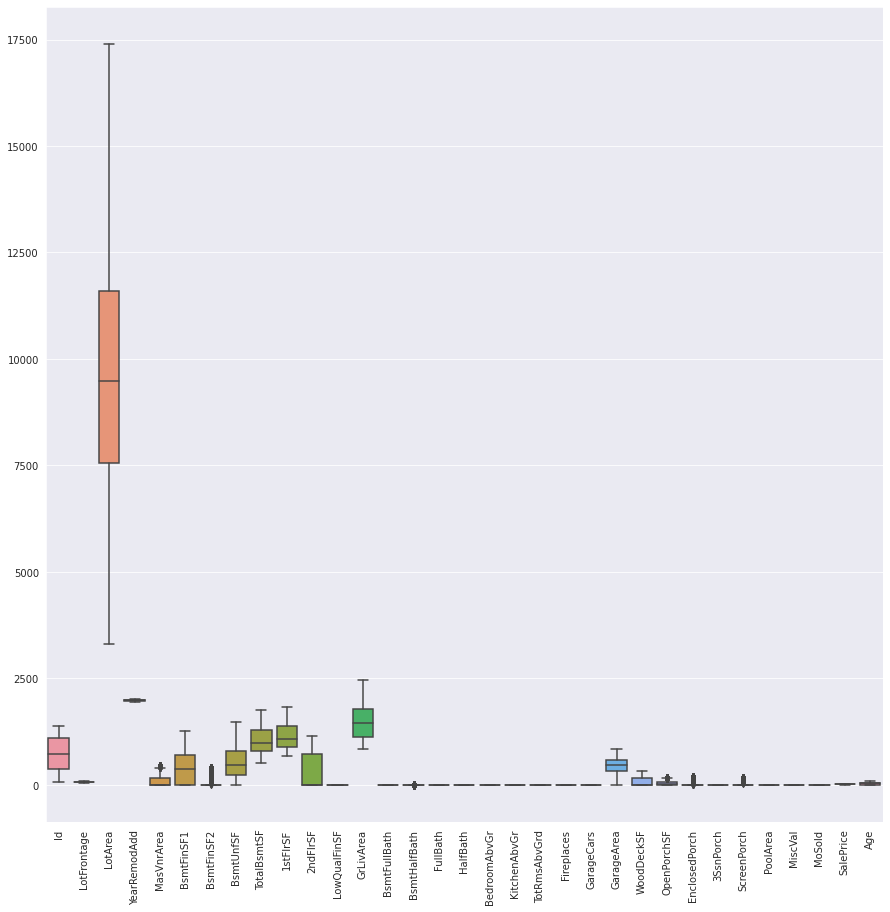

In [38]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

**So, we have removed outliers from all numerical columns**

In [39]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([df_num, df_cat_encoded], axis=1)


## View the first few rows of our dataframe
df.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,

Our dataframe is ready for model building now..

# **5. Model Building, Tuning and Evaluation**

## **Split the Data into Dependent and Independent variables**

In [40]:
## X contains all independent variables use to make predictions except 'Id' (not useful) and 'SalePrice' (target variable)
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1

In [41]:
## Separate out the target variable as y which we want to predict
y = df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

## **Train - Test Split**

In [42]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [43]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1168, 384)
(1168,)


In [44]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(292, 384)
(292,)


## **Scaling numerical columns**

In [45]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [46]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## **Model 1: Ridge Regression**

In [47]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [48]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [50]:
## View the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.04646778, 0.03657875, 0.03593974, 0.03774014, 0.03492155,
        0.04031358, 0.03741007, 0.03326578, 0.03480663, 0.03630619,
        0.0368319 , 0.03330307, 0.03472085, 0.03293238, 0.03580217,
        0.03572044, 0.03228827, 0.03255424, 0.03336992, 0.03295813,
        0.03523979, 0.03564563, 0.03308072, 0.03429089, 0.03432074,
        0.03475904, 0.03389225, 0.03245573]),
 'std_fit_time': array([0.01529012, 0.00258306, 0.00169066, 0.00351952, 0.00191591,
        0.01018676, 0.00670984, 0.00048609, 0.00513812, 0.00333739,
        0.0046183 , 0.00134453, 0.00348867, 0.00069971, 0.0045395 ,
        0.00478826, 0.00101014, 0.00170048, 0.00080818, 0.00074405,
        0.00247479, 0.00444433, 0.00100264, 0.00287432, 0.00071933,
        0.00238588, 0.00110348, 0.00547332]),
 'mean_score_time': array([0.00698833, 0.00724015, 0.00747142, 0.00706716, 0.00753555,
        0.00712276, 0.00728669, 0.00758519, 0.00702429, 0.00936069,
        0.00736732, 0.007376  , 0.007198

**Thus, we get optimum value of alpha as 10. Now we will build a ridge regression model using this value.**

In [51]:
# Create a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=10)

In [52]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [53]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([ 6.56023354e-03,  2.07307896e-02,  2.49825538e-02, -2.40354563e-03,
        1.00177182e-02, -3.15225697e-04, -1.49039561e-02,  5.20474484e-02,
        7.45664130e-03,  2.88435254e-02,  0.00000000e+00,  8.85807944e-02,
        8.24181724e-03, -4.24723298e-04,  1.17438229e-02,  1.25064397e-02,
        4.98554634e-03,  0.00000000e+00, -3.41180286e-04,  1.92127953e-02,
        1.68790936e-02,  1.67328322e-02,  1.23269319e-02,  7.87306236e-03,
        2.53822117e-03,  0.00000000e+00,  1.07139979e-02,  0.00000000e+00,
        0.00000000e+00, -7.78499263e-04, -5.04655943e-02, -4.07061234e-02,
        5.51648124e-03,  6.20801048e-04, -4.85860044e-03, -5.71150836e-03,
        3.91666483e-02,  3.10825761e-02,  7.08003745e-04,  4.75844066e-03,
       -3.48924107e-02,  5.93672173e-03, -5.14776147e-02, -1.19237188e-02,
       -1.79847431e-02,  3.50102825e-02,  1.44037721e-02,  1.11946464e-02,
       -2.40515945e-02, -5.34877888e-03, -5.46542710e-03,  1.64560909e-02,
        1.08365421e-02, -

In [54]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [55]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.53
RSS (Test) = 2.87
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


**Now, we will plot R2 Score against different values of alpha for both train and test sets**

In [56]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046468,0.015290,0.006988,0.000458,0.0001,{'alpha': 0.0001},-0.081673,-0.101828,-0.099273,-0.096434,-0.090032,-0.093848,0.007247,27,-0.050141,-0.047046,-0.049716,-0.048656,-0.050523,-0.049216,0.001252
1,0.036579,0.002583,0.007240,0.000579,0.001,{'alpha': 0.001},-0.081586,-0.100936,-0.097448,-0.096137,-0.088669,-0.092955,0.006952,26,-0.050186,-0.047090,-0.049807,-0.048683,-0.050567,-0.049267,0.001257
2,0.035940,0.001691,0.007471,0.000375,0.01,{'alpha': 0.01},-0.080603,-0.098118,-0.096195,-0.093890,-0.086340,-0.091029,0.006570,24,-0.050525,-0.047447,-0.049991,-0.048910,-0.050870,-0.049549,0.001242
3,0.037740,0.003520,0.007067,0.000507,0.05,{'alpha': 0.05},-0.080104,-0.094781,-0.094142,-0.089630,-0.084896,-0.088710,0.005583,23,-0.051380,-0.048349,-0.050284,-0.049557,-0.051367,-0.050187,0.001149
4,0.034922,0.001916,0.007536,0.000522,0.1,{'alpha': 0.1},-0.079578,-0.092349,-0.092476,-0.087975,-0.083697,-0.087215,0.005006,22,-0.051928,-0.048977,-0.050526,-0.050098,-0.051739,-0.050653,0.001090
5,0.040314,0.010187,0.007123,0.000794,0.2,{'alpha': 0.2},-0.078602,-0.089576,-0.090176,-0.086364,-0.081951,-0.085334,0.004456,21,-0.052536,-0.049725,-0.050884,-0.050716,-0.052282,-0.051229,0.001045
6,0.037410,0.006710,0.007287,0.000204,0.3,{'alpha': 0.3},-0.077658,-0.087865,-0.088637,-0.085487,-0.080548,-0.084039,0.004261,20,-0.052908,-0.050268,-0.051158,-0.051115,-0.052701,-0.051630,0.001012
7,0.033266,0.000486,0.007585,0.000927,0.4,{'alpha': 0.4},-0.076766,-0.086746,-0.087422,-0.084962,-0.079398,-0.083059,0.004225,19,-0.053212,-0.050674,-0.051392,-0.051402,-0.053051,-0.051946,0.001005
8,0.034807,0.005138,0.007024,0.000285,0.5,{'alpha': 0.5},-0.075957,-0.085866,-0.086434,-0.084655,-0.078419,-0.082266,0.004258,17,-0.053475,-0.050982,-0.051588,-0.051638,-0.053344,-0.052205,0.001011
9,0.036306,0.003337,0.009361,0.003631,0.6,{'alpha': 0.6},-0.075217,-0.085126,-0.085603,-0.084392,-0.077594,-0.081586,0.004314,16,-0.053706,-0.051237,-0.051773,-0.051848,-0.053592,-0.052431,0.001017


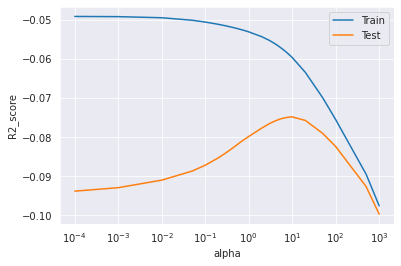

In [57]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

* **As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.**

* **From graph also, it is apparent that the optimal value of alpha is 10.**

## **Model 2: Lasso Regression**

In [58]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [60]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.29511762, 0.0750875 , 0.04634805, 0.04796472, 0.03215871,
        0.03838916, 0.0393815 , 0.03837438, 0.03431387, 0.03586507,
        0.03657446, 0.02566681, 0.0187849 , 0.01786685, 0.02198081,
        0.01947818, 0.01747379, 0.01751876, 0.01755714, 0.0172327 ,
        0.01804824, 0.01784534, 0.02008152, 0.02137222, 0.01740031,
        0.0194016 , 0.01753721, 0.01887641]),
 'std_fit_time': array([0.06411831, 0.02755631, 0.00455803, 0.00374047, 0.00942742,
        0.01482577, 0.0062887 , 0.00165433, 0.00500204, 0.00475999,
        0.00299412, 0.00954064, 0.00113483, 0.00013032, 0.00852317,
        0.0040927 , 0.00055183, 0.00135027, 0.00037994, 0.0003386 ,
        0.00141773, 0.00057782, 0.00138625, 0.00307433, 0.00031717,
        0.00282969, 0.00019205, 0.00210844]),
 'mean_score_time': array([0.01501751, 0.01203666, 0.01233687, 0.01492753, 0.01445818,
        0.01231418, 0.01534019, 0.0124516 , 0.01319962, 0.01335926,
        0.01685009, 0.013518  , 0.006622

**Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.**

In [61]:
# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [62]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [63]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 3.32682408e-03,  2.16451599e-02,  2.86137657e-02, -0.00000000e+00,
        2.58744193e-02,  1.54710949e-03, -0.00000000e+00,  4.26216769e-02,
       -0.00000000e+00,  1.06155389e-02,  0.00000000e+00,  1.06041784e-01,
        9.12081960e-03,  0.00000000e+00,  6.21173109e-03,  9.99869860e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.25705165e-02,
        1.92103380e-02,  1.94273494e-02,  1.12714413e-02,  7.92455346e-03,
        1.78530093e-03,  0.00000000e+00,  1.05985103e-02,  0.00000000e+00,
        0.00000000e+00, -7.58249012e-05, -5.22898052e-02, -3.01060185e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.05179688e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64536115e-02,  0.00000000e+00, -4.41801750e-02, -0.00000000e+00,
       -0.00000000e+00,  3.77888104e-03,  0.00000000e+00,  0.00000000e+00,
       -3.73748455e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [64]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [65]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 11.29
RSS (Test) = 2.92
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


**Now, we will plot R2 Score against different values of alpha for both train and test sets**

In [66]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.295118,0.064118,0.015018,0.003155,0.0001,{'alpha': 0.0001},-0.069359,-0.081482,-0.081075,-0.081927,-0.076828,-0.078134,0.004753,2,-0.056185,-0.053654,-0.053858,-0.054045,-0.055400,-0.054628,0.000990
1,0.075087,0.027556,0.012037,0.004481,0.001,{'alpha': 0.001},-0.068861,-0.081934,-0.078314,-0.080142,-0.070993,-0.076049,0.005172,1,-0.071447,-0.066902,-0.068326,-0.068838,-0.070007,-0.069104,0.001538
2,0.046348,0.004558,0.012337,0.003013,0.01,{'alpha': 0.01},-0.091298,-0.110751,-0.100678,-0.104328,-0.090304,-0.099472,0.007786,3,-0.098851,-0.094454,-0.096974,-0.096364,-0.099009,-0.097130,0.001689
3,0.047965,0.003740,0.014928,0.004833,0.05,{'alpha': 0.05},-0.109268,-0.132709,-0.129491,-0.126993,-0.113521,-0.122396,0.009262,4,-0.122950,-0.118050,-0.121625,-0.120657,-0.122787,-0.121214,0.001787
4,0.032159,0.009427,0.014458,0.007600,0.1,{'alpha': 0.1},-0.144592,-0.168175,-0.180403,-0.164885,-0.150902,-0.161791,0.012736,5,-0.164458,-0.157521,-0.160557,-0.159796,-0.161292,-0.160725,0.002255
5,0.038389,0.014826,0.012314,0.005378,0.2,{'alpha': 0.2},-0.239648,-0.251524,-0.277194,-0.255624,-0.233263,-0.251451,0.015167,6,-0.256051,-0.249270,-0.250132,-0.247912,-0.251069,-0.250887,0.002783
6,0.039382,0.006289,0.015340,0.003040,0.3,{'alpha': 0.3},-0.274800,-0.286080,-0.307810,-0.291118,-0.268801,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
7,0.038374,0.001654,0.012452,0.000800,0.4,{'alpha': 0.4},-0.274800,-0.286080,-0.307810,-0.291118,-0.268801,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
8,0.034314,0.005002,0.013200,0.000712,0.5,{'alpha': 0.5},-0.274800,-0.286080,-0.307810,-0.291118,-0.268801,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
9,0.035865,0.004760,0.013359,0.000201,0.6,{'alpha': 0.6},-0.274800,-0.286080,-0.307810,-0.291118,-0.268801,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211


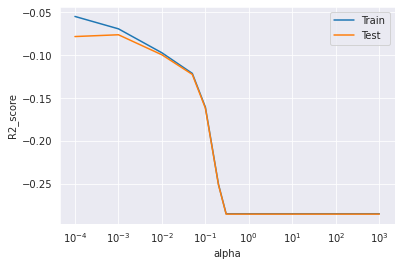

In [67]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

* **As the value of alpha increases, we see a decrease in both train and test error.**

* **However, after a error value of approximately 0.05, error remains constant.**

# **6. Comparing the two models**

In [68]:
## Setting float display options
pd.options.display.float_format = "{:,.2f}".format

In [69]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.94,0.92
R2 Score (Test),0.93,0.93
RSS (Train),8.53,11.29
RSS (Test),2.87,2.92
MSE (Train),0.01,0.01
MSE (Test),0.01,0.01
RMSE (Train),0.09,0.10
RMSE (Test),0.10,0.10


**The R2 score on test data is 0.93 for both Ridge Regression and Lasso models.**

In [70]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF


In [71]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [72]:
## View the betas/coefficients
betas 

,Ridge,Lasso
LotFrontage,0.01,0.00
LotArea,0.02,0.02
YearRemodAdd,0.02,0.03
MasVnrArea,-0.00,-0.00
BsmtFinSF1,0.01,0.03
BsmtFinSF2,-0.00,0.00
BsmtUnfSF,-0.01,-0.00
TotalBsmtSF,0.05,0.04
1stFlrSF,0.01,-0.00
2ndFlrSF,0.03,0.01


In [73]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
MasVnrArea,-0.00,-0.00
BsmtUnfSF,-0.01,-0.00
1stFlrSF,0.01,-0.00
LowQualFinSF,0.00,0.00
BsmtHalfBath,-0.00,0.00
BedroomAbvGr,0.00,0.00
KitchenAbvGr,0.00,0.00
TotRmsAbvGrd,-0.00,-0.00
3SsnPorch,0.00,0.00
PoolArea,0.00,0.00


In [74]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(306, 2)

* **The above 306 features out of 384 (from X_train) have been removed by Lasso. In this way, lasso performs feature selection**

* **Below are the features selected by Lasso**

In [75]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.00
LotArea                  0.02
YearRemodAdd             0.03
BsmtFinSF1               0.03
BsmtFinSF2               0.00
TotalBsmtSF              0.04
2ndFlrSF                 0.01
GrLivArea                0.11
BsmtFullBath             0.01
FullBath                 0.01
HalfBath                 0.01
Fireplaces               0.02
GarageCars               0.02
GarageArea               0.02
WoodDeckSF               0.01
OpenPorchSF              0.01
EnclosedPorch            0.00
ScreenPorch              0.01
MoSold                  -0.00
Age                     -0.05
MSSubClass_30           -0.00
MSSubClass_70            0.03
MSSubClass_90           -0.02
MSSubClass_160          -0.04
MSZoning_FV              0.00
MSZoning_RM             -0.04
LotShape_Reg            -0.00
LotConfig_CulDSac        0.02
Neighborhood_BrkSide     0.03
Neighborhood_ClearCr     0.00
Neighborhood_Crawfor     0.09
Neighborhood_Edwards    -0.03
Neighborhood_MeadowV    -0.03
Neighborho

# **7. Inferences for 'Housing Price Prediction'**

**Now, we will look at the top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model**

In [76]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.09
OverallQual_9          0.08
OverallQual_8          0.08
Neighborhood_Crawfor   0.08
OverallCond_9          0.07
Functional_Typ         0.07
Exterior1st_BrkFace    0.07
SaleCondition_Alloca   0.06
CentralAir_Y           0.05
TotalBsmtSF            0.05
Name: Ridge, dtype: float64

In [77]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.09
OverallQual_9          1.08
OverallQual_8          1.08
Neighborhood_Crawfor   1.08
OverallCond_9          1.08
Functional_Typ         1.07
Exterior1st_BrkFace    1.07
SaleCondition_Alloca   1.07
CentralAir_Y           1.06
TotalBsmtSF            1.05
Name: Ridge, dtype: float64

In [78]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.12
GrLivArea              0.11
OverallQual_8          0.10
Neighborhood_Crawfor   0.09
Exterior1st_BrkFace    0.08
Functional_Typ         0.08
CentralAir_Y           0.05
Neighborhood_Somerst   0.04
TotalBsmtSF            0.04
Condition1_Norm        0.04
Name: Lasso, dtype: float64

In [79]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.13
GrLivArea              1.11
OverallQual_8          1.11
Neighborhood_Crawfor   1.09
Exterior1st_BrkFace    1.08
Functional_Typ         1.08
CentralAir_Y           1.05
Neighborhood_Somerst   1.04
TotalBsmtSF            1.04
Condition1_Norm        1.04
Name: Lasso, dtype: float64

## **Inferences:**

**The variables significant in predicting the price of a house are:-**

GrLivArea, OverallQual_9, OverallCond_9, OverallQual_8, Neighborhood_Crawfor, Functional_Typ, Exterior1st_BrkFace, SaleCondition_Alloca, CentralAir_Y, TotalBsmtSF, Neighborhood_Somerst, TotalBsmtSF and Condition1_Norm

**How well those variables describe the price of a house?**

Here will see only top few variables

* GrLivArea:an increase of 1 square foot of house area above ground, the price will increase by 1.09 to 1.11 times
* OverallQual_9 & OverallQual_8: if the overall material and finish of the house is Very Good or Excellent, the price of house will increase by 1.08 to 1.13 times
* Neighborhood_Crawfor: if Crawford is a nearby location, then the price of house will increase by 1.07 to 1.09 times
* Functional_Typ: if the home functionality is typical, then the price of house will increase by 1.07 to 1.08 times
* Exterior1st_BrkFace: if the exterior covering on the house is Brick Face, the price of house will increase by 1.07 to 1.08 times.

In a similar manner, we can deduct how well each variable describes the price of a house.

**Optimal value of lambda for Ridge Regression = 10**

**Optimal value of lambda for Lasso = 0.001**

# **8. Coding for answering the subjective questions**

## **Question 1**
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### **Answer:**
* Optimal value of lambda for Ridge Regression = **10**
* Optimal value of lambda for Lasso = **0.001**

In [80]:
## Let us build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=20)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [81]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [82]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.93
RSS (Train) = 9.37
RSS (Test) = 2.82
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [83]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [84]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [85]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
RSS (Train) = 13.49
RSS (Test) = 3.45
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


In [86]:
# Again creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.93,0.91
R2 Score (Test),0.93,0.91
RSS (Train),9.37,13.49
RSS (Test),2.82,3.45
MSE (Train),0.01,0.01
MSE (Test),0.01,0.01
RMSE (Train),0.09,0.11
RMSE (Test),0.10,0.11


**Changes in Ridge Regression metrics:**

* R2 score of train set decreased from 0.94 to 0.93
* R2 score of test set remained same at 0.93

**Changes in Lasso metrics:**
* R2 score of train set decreased from 0.92 to 0.91
* R2 score of test set decreased from 0.93 to 0.91

In [87]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF


In [88]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [89]:
## View the betas/coefficients
betas 

,Ridge,Lasso
LotFrontage,0.01,0.00
LotArea,0.02,0.02
YearRemodAdd,0.03,0.04
MasVnrArea,-0.00,-0.00
BsmtFinSF1,0.02,0.03
BsmtFinSF2,0.00,0.00
BsmtUnfSF,-0.01,-0.00
TotalBsmtSF,0.05,0.05
1stFlrSF,0.01,-0.00
2ndFlrSF,0.03,0.01


**Now, we look at the most important predictor variables after the change is implemented.**

In [90]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.08
OverallQual_8          0.07
OverallQual_9          0.06
Neighborhood_Crawfor   0.06
Functional_Typ         0.06
Exterior1st_BrkFace    0.06
OverallCond_9          0.05
TotalBsmtSF            0.05
CentralAir_Y           0.05
OverallCond_7          0.04
Name: Ridge, dtype: float64

In [91]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.08
OverallQual_8          1.07
OverallQual_9          1.07
Neighborhood_Crawfor   1.07
Functional_Typ         1.06
Exterior1st_BrkFace    1.06
OverallCond_9          1.06
TotalBsmtSF            1.05
CentralAir_Y           1.05
OverallCond_7          1.04
Name: Ridge, dtype: float64

In [92]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.11
OverallQual_8          0.08
OverallQual_9          0.08
Functional_Typ         0.07
Neighborhood_Crawfor   0.07
TotalBsmtSF            0.05
Exterior1st_BrkFace    0.04
CentralAir_Y           0.04
YearRemodAdd           0.04
Condition1_Norm        0.03
Name: Lasso, dtype: float64

In [93]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.11
OverallQual_8          1.09
OverallQual_9          1.08
Functional_Typ         1.07
Neighborhood_Crawfor   1.07
TotalBsmtSF            1.05
Exterior1st_BrkFace    1.05
CentralAir_Y           1.04
YearRemodAdd           1.04
Condition1_Norm        1.03
Name: Lasso, dtype: float64

**So, the most important predictor variables after we double the alpha values are:-**
* GrLivArea
* OverallQual_8
* OverallQual_9
* Functional_Typ
* Neighborhood_Crawfor
* Exterior1st_BrkFace
* TotalBsmtSF
* CentralAir_Y

# **Question 2**
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

### **Answer**
* The model we will choose to apply will depend on the use case.
* If we have too many variables and one of our primary goal is feature selection, then we will use Lasso.
* If we don't want to get too large coefficients and reduction of coefficient magnitude is one of our prime goals, then we will use Ridge Regression.

## **Question 3**
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### **Answer**
* Here, we will drop the top 5 features in Lasso model and build the model again.

Top 5 Lasso predictors were: OverallQual_9, GrLivArea, OverallQual_8,Neighborhood_Crawfor and Exterior1st_BrkFace

In [94]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'Exterior1st_BrkFace']

In [95]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [96]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

**Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.**

In [98]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [100]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [101]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [102]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
RSS (Train) = 12.75
RSS (Test) = 3.02
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


**Now, we will find the top 5 predictors**

In [103]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Lasso Regression
Metric,
R2 Score (Train),0.91
R2 Score (Test),0.92
RSS (Train),12.75
RSS (Test),3.02
MSE (Train),0.01
MSE (Test),0.01
RMSE (Train),0.10
RMSE (Test),0.10


In [104]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF


In [105]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Lasso'] = lasso.coef_
# betas['Lasso'] = lasso.coef_

In [106]:
## View the betas/coefficients
betas 

,Lasso
LotFrontage,0.00
LotArea,0.02
YearRemodAdd,0.03
MasVnrArea,-0.00
BsmtFinSF1,0.03
BsmtFinSF2,0.00
BsmtUnfSF,-0.00
TotalBsmtSF,0.05
1stFlrSF,0.07
2ndFlrSF,0.10


**Now, we will look at the top 5 features significant in predicting the value of a house according to the new lasso model**

In [107]:
## View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF               0.10
Functional_Typ         0.07
1stFlrSF               0.07
MSSubClass_70          0.06
Neighborhood_Somerst   0.06
Name: Lasso, dtype: float64

**After dropping our top 5 lasso predictors, we get the following new top 5 predictors:-**
* 2ndFlrSF
* Functional_Typ
* 1stFlrSF
* MSSubClass_70
* Neighborhood_Somerst

## **Question 4**
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

### **Answer**
* A model is robust when any variation in the data does not affect its performance much.

* A generalizable model is able to adapt properly to new, previously unseen data, drawn from the same distribution as the one used to create the model.

* To make sure a model is robust and generalizable, we have to take care it doesn't overfit. This is because an overfitting model has very high variance and a smallest change in data affects the model prediction heavily. Such a model will identify all the patterns of a training data, but fail to pick up the patterns in unseen test data.

* In other words, the model should not be too complex in order to be robust and generalizable.

* If we look at it from the prespective of Accuracy, a too complex model will have a very high accuracy. So, to make our model more robust and generalizable, we will have to decrease variance which will lead to some bias. Addition of bias means that accuracy will decrease.

* In general, we have to find strike some balance between model accuracy and complexity. This can be achieved by Regularization techniques like Ridge Regression and Lasso.